# Model Comparison With Finance Data
This notebook demonstrates how to run the prediction models on financial data

In [1]:
import sys
import os

%matplotlib inline

# Add the project root (one level up from 'notebooks') to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Imports from our src/ modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import autocorrelation_plot

from src.data.load_fin_data import load_finance_data, load_fred_data
from src.data.preprocess_fin_data import enrich_target_stock, flatten_cols
from src.data.make_dataset import train_test_split
from src.data.split_sequences import prepare_train_val_test
from src.models.base_ARIMA import run_arima_on_dataset

from src.evaluation.evaluate import evaluate_model
from src.evaluation.metrics import generate_model_metrics
from src.data.scaler_utils import get_scaler
from src.data.adjusted_r2 import adjusted_r2

# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import RobustScaler

# from statsmodels.tsa.arima.model import ARIMA
# from math import sqrt

In [3]:
finance_data = pd.read_csv('../data/dataset_finance/processed/processed_finance_data.csv')

finance_data

,Date,Close_TSLA,Volume_TSLA,TSLA_Returns,TSLA_day,TSLA_month,TSLA_weekday,day_sin,day_cos,month_sin,...,Close_SOXX,Volume_SOXX,SOXX_Returns,PCE_Price_Index,Core_PCE_Price_Index,10-Year_Treasury_Yield,Federal_Funds_Rate,University_of_Michigan-Consumer_Sentiment,Consumer_Price_Index-All_Items-Total_for_United_States,Total_Vehicle_Sales
0,2014-09-17,17.425333,77665500.0,0.002454,17.0,9.0,2.0,-0.299363,-0.954139,-1.000000,...,26.093210,444000.0,0.007184,97.413,96.013,2.62,0.09,84.6,0.075257,16.959
1,2014-09-18,17.587999,55389000.0,0.009335,18.0,9.0,3.0,-0.485302,-0.874347,-1.000000,...,26.492056,355500.0,0.015285,97.413,96.013,2.63,0.09,84.6,0.075257,16.959
2,2014-09-19,17.288000,102163500.0,-0.017057,19.0,9.0,4.0,-0.651372,-0.758758,-1.000000,...,26.161163,339000.0,-0.012490,97.413,96.013,2.59,0.09,84.6,0.075257,16.959
3,2014-09-22,16.668667,123211500.0,-0.035824,22.0,9.0,0.0,-0.968077,-0.250653,-1.000000,...,25.845039,315600.0,-0.012084,97.413,96.013,2.57,0.09,84.6,0.075257,16.959
4,2014-09-23,16.694000,84880500.0,0.001520,23.0,9.0,1.0,-0.998717,-0.050649,-1.000000,...,25.762320,632700.0,-0.003201,97.413,96.013,2.54,0.09,84.6,0.075257,16.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2024-02-26,199.399994,111747100.0,0.038704,26.0,2.0,0.0,-0.848644,0.528964,0.866025,...,212.632172,3759000.0,0.009867,122.494,121.418,4.28,5.33,76.9,0.618967,16.177
2374,2024-02-27,199.729996,108645400.0,0.001655,27.0,2.0,1.0,-0.724793,0.688967,0.866025,...,212.420441,4560900.0,-0.000996,122.494,121.418,4.31,5.33,76.9,0.618967,16.177
2375,2024-02-28,202.039993,99806200.0,0.011566,28.0,2.0,2.0,-0.571268,0.820763,0.866025,...,210.031952,2923800.0,-0.011244,122.494,121.418,4.27,5.33,76.9,0.618967,16.177
2376,2024-02-29,201.880005,85907000.0,-0.000792,29.0,2.0,3.0,-0.394356,0.918958,0.866025,...,215.721985,3382800.0,0.027091,122.494,121.418,4.25,5.33,76.9,0.618967,16.177


c:\Users\gnniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



[ARIMA - Finance] Evaluation Summary (Statsmodels ARIMA)
---------------------------------------------------------------------------
RMSE                : 25.954
MAE                 : 24.023
MAPE (%)            : 10.892
R²                  : 0.795
Adjusted R²         : 0.769
Training Time (s)   : 16.71
Memory Used (MB)    : 16.41
Device Used         : CPU
---------------------------------------------------------------------------


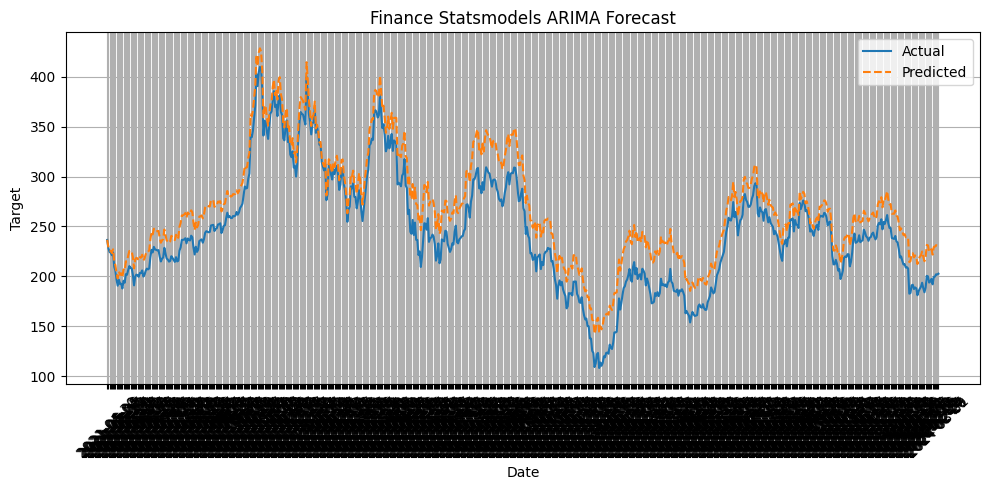

{'Dataset': 'Finance',
 'Model': 'Statsmodels ARIMA',
 'Target': 'Close_TSLA',
 'RMSE': 25.95396577560627,
 'MSE': 673.6083394813417,
 'MAE': 24.022785599042027,
 'MAPE': 10.891656914764543,
 'R²': 0.7951970893093468,
 'Adj_R²': 0.7685824479834616,
 'TrainingTime_s': 16.714026927947998,
 'TestRatio': 0.3,
 'Device': 'CPU',
 'FinalMemoryMB': 464.0625}

In [4]:
# Run ARIMA Model on Finance Data

# Define parameters for LSTM model
data = finance_data
finance_data.name = "Finance"
target = "Close_TSLA"  # Target variable to predict
date_col = "Date"  # Column name for the date
test_ratio = 0.3  # Proportion of data to use for testing
engine = "statsmodels" # Engine to use for ARIMA model
order=(5, 1, 0)  # ARIMA order (p, d, q)

# finance_arima_results = run_arima_on_dataset(
    # finance_data,
    # target,
    # date_col,
    # test_ratio,
    # engine
# )

finance_arima_results = run_arima_on_dataset(
    finance_data,
    target,
    date_col,
    test_ratio,
    engine,
    order
)

finance_arima_results

In [8]:
# load parquet data to pandas dataframe
retail_data = pd.read_parquet('../data/dataset_retail/processed/data_with_lags_s1_i1.parquet')
retail_data	= retail_data.drop(columns=['split'])

retail_data

,date,sales,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,...,sales_roll_mean_60d,sales_roll_std_60d,sales_roll_median_60d,sales_roll_min_60d,sales_roll_max_60d,sales_roll_mean_90d,sales_roll_std_90d,sales_roll_median_90d,sales_roll_min_90d,sales_roll_max_90d
0,2014-01-01,9,2014,1,1,2,1,1,1,1,...,15.416667,5.645732,16.0,5.0,31.0,15.733333,5.120569,16.0,5.0,31.0
1,2014-01-02,14,2014,1,2,3,2,1,1,0,...,15.333333,5.628820,16.0,5.0,31.0,15.733333,5.120569,16.0,5.0,31.0
2,2014-01-03,11,2014,1,3,4,3,1,1,0,...,15.316667,5.640326,16.0,5.0,31.0,15.700000,5.141700,16.0,5.0,31.0
3,2014-01-04,20,2014,1,4,5,4,1,1,0,...,15.316667,5.640326,16.0,5.0,31.0,15.700000,5.141700,16.0,5.0,31.0
4,2014-01-05,17,2014,1,5,6,5,1,1,0,...,15.333333,5.643856,16.0,5.0,31.0,15.744444,5.135383,16.0,5.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2017-12-27,14,2017,12,27,2,361,52,4,0,...,19.866667,6.261171,19.0,6.0,34.0,20.193182,5.908999,20.0,6.0,34.0
1457,2017-12-28,19,2017,12,28,3,362,52,4,0,...,19.700000,6.145965,19.0,6.0,34.0,20.179775,5.876691,20.0,6.0,34.0
1458,2017-12-29,15,2017,12,29,4,363,52,4,0,...,19.583333,6.167964,19.0,6.0,34.0,20.122222,5.869035,20.0,6.0,34.0
1459,2017-12-30,27,2017,12,30,5,364,52,4,0,...,19.633333,6.216344,19.0,6.0,34.0,20.188889,5.913030,20.0,6.0,34.0


c:\Users\gnniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



[ARIMA - Retail] Evaluation Summary (Statsmodels ARIMA)
---------------------------------------------------------------------------
RMSE                : 130.168
MAE                 : 107.860
MAPE (%)            : 604.872
R²                  : -369.767
Adjusted R²         : -415.478
Training Time (s)   : 17.20
Memory Used (MB)    : 6.58
Device Used         : CPU
---------------------------------------------------------------------------


ValueError: x and y must have same first dimension, but have shapes (503,) and (411,)

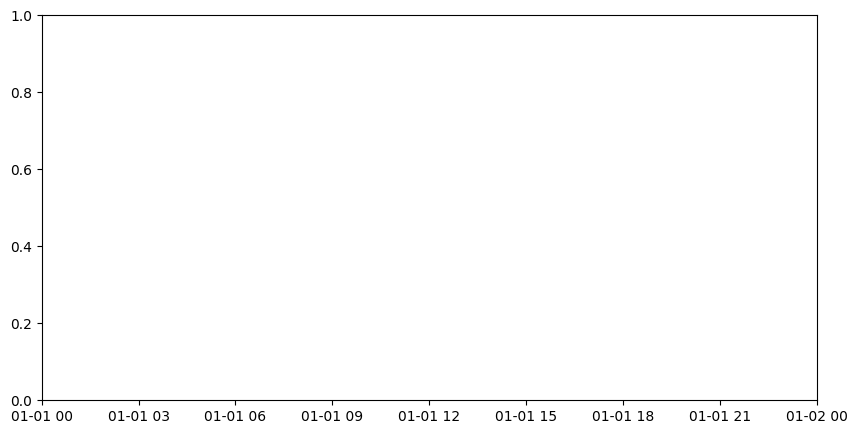

In [9]:
# Run LSTM Model on Retail Data

# Define parameters for LSTM model
data = retail_data
retail_data.name = "Retail"
target = 'sales'  # Target variable to predict
date_col = 'date'  # Column name for the date
seq_length = 30  # Number of time steps to look back
test_ratio = 0.3  # Proportion of data to use for testing
engine = "statsmodels" # Engine to use for ARIMA model
order=(5, 1, 0)  # ARIMA order (p, d, q)

# retail_arima_results = run_arima_on_dataset(
    # retail_data,
    # target,
    # date_col,
    # test_ratio,
    # engine
# )

retail_arima_results = run_arima_on_dataset(
    retail_data,
    target,
    date_col,
    test_ratio,
    engine,
    order
)

retail_arima_results

In [ ]:
# ARIMA is represented by three parameters: p, d, and q:
# p: The number of past values (lags) considered in the AR term.
# d: The degree of differencing applied to the data.
# q: The number of past forecast errors included in the MA term.
# order = (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers.

order = (5, 1, 0)
predictions, train, test = build_arima_model(combined_data[target], order, 0.7)

# Convert to numpy arrays (in case they're lists)
test = np.array(test)
predictions = np.array(predictions)
 
rmse, mse, mae, mape, r2, adj_r2	= generate_model_metrics(predictions, test)

# Root Mean Squared Error
# rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Mean Squared Error
# mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)

# Mean Absolute Error
# mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

# Mean Absolute Percentage Error
# mape = np.mean(np.abs((test - predictions) / test)) * 100
print('Test MAPE: %.3f' % mape)

# R-squared
# r2 = r2_score(test, predictions)
print('Test R²: %.3f' % r2)

# Adjusted R-squared
n = len(test)
p = 1  # number of predictors (just 1 for ARIMA by default)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R²: %.3f' % adj_r2)

# plot forecasts against actual outcomes
plt.plot(test, color='blue', label='Actual', linewidth=2, alpha=0.7)
plt.plot(predictions, color='red', label='Predicted', linestyle='--', linewidth=2)
plt.legend()
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Price (USD)')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
metrics_scores = {}
metrics_scores[target] = {"RMSE": rmse, "MSE": mse, "MAE": mae, "MAPE": mape, "R2": r2, "Adj_R2": adj_r2}
metrics_df = pd.DataFrame(metrics_scores).T  # Transpose so models are rows
# metrics_df.to_csv("model_metrics_scores.csv")
print(metrics_df)